# Non Linear Regression Models

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [4]:
# Read in the data
url = 'https://raw.githubusercontent.com/brash99/phys341/master/JupyterNotebooks/nonlinear_data.txt'
df = pd.read_csv(url)
df.head(100)

,FactoryID,Production_Rate
0,1,103
1,1,102
2,1,96
3,2,98
4,2,86
5,2,92
6,3,87
7,3,91
8,3,94
9,4,96


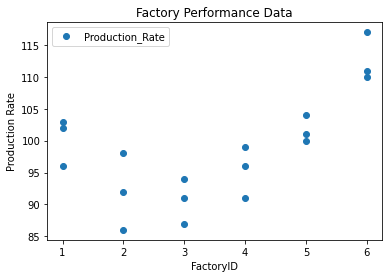

In [5]:
# plot the data
df.plot('FactoryID','Production_Rate',style='o')
plt.ylabel('Production Rate')
plt.title('Factory Performance Data')
plt.show()

## Observations:

There appears to be a nonlinear trend with factory ID number.

The procedure here is as follows:

1.  Determine the overall effect - that is, determine SS_treatment, SS_error, SS_total
2.  Perform a linear fit - use this to determine what fraction of SS_treatment is due to a linear dependence.
3.  Perform a quadratic fit - use this to determine what fraction of SS_treatment is due to a quadratic dependence.
4.  Keep going until we run our of non-linear dependence.

## Step 1:  Carry out a basic Signal/Noise Analysis, using one-way ANOVA

In [8]:
## Step 1:  Carry out a basic Signal/Noise Analysis, using one-way ANOVA

model = sm.ols('Production_Rate ~ C(FactoryID)',df).fit()
anovaResults = anova_lm(model)

print (anovaResults)

## Remember the SS values:

SS_treatment = anovaResults[:]['sum_sq'][0]
SS_error_0 = anovaResults[:]['sum_sq'][1]
SS_total_0 = SS_treatment + SS_error_0

v_treatment = anovaResults[:]['df'][0]
v_error_0 = anovaResults[:]['df'][1]
v_total_0 = v_treatment + v_error_0

print ()
print ("SS_treatment, SS_error, SS_total, v_treatment, v_error, v_total")
print (SS_treatment, SS_error_0, SS_total_0, v_treatment, v_error_0, v_total_0)

                df      sum_sq     mean_sq          F    PR(>F)
C(FactoryID)   5.0  981.777778  196.355556  12.062799  0.000243
Residual      12.0  195.333333   16.277778        NaN       NaN

SS_treatment, SS_error, SS_total, v_treatment, v_error, v_total
981.7777777777796 195.33333333333334 1177.111111111113 5.0 12.0 17.0


In [9]:
print ("Indeed, a one-way ANOVA confirms that there is some dependence of the production rate")
print ("on factory ID number.")

Indeed, a one-way ANOVA confirms that there is some dependence of the production rate
on factory ID number.


## Step 2:  Perform a linear fit to the data, and extract SS_linear

                            OLS Regression Results                            
Dep. Variable:        Production_Rate   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     7.913
Date:                Fri, 05 Nov 2021   Prob (F-statistic):             0.0125
Time:                        08:55:25   Log-Likelihood:                -59.549
No. Observations:                  18   AIC:                             123.1
Df Residuals:                      16   BIC:                             124.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.2444      3.771     23.666      0.0

/usr/local/lib64/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


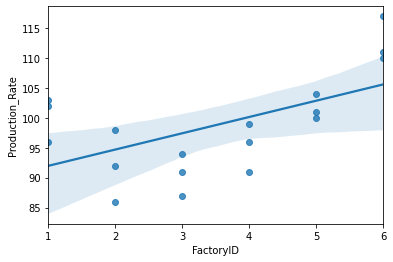

In [10]:
# Step 2:  Perform a linear fit to the data, and extract SS_linear
import seaborn as sns
sns.regplot('FactoryID', 'Production_Rate', df, ci=95)

linear = sm.ols('Production_Rate ~ FactoryID',df,).fit()
print (linear.summary())

In [12]:
yint = linear.params[0]
slope = linear.params[1]

r2 = linear.rsquared

N_linear = 2
v_linear = N_linear - 1

N = len(df['FactoryID'])
v_total_1 = N - 1
v_error_1 = v_total_1 - v_linear

In [19]:
SS_total_1 = (N-1)*df['Production_Rate'].var()

SS_linear = r2*SS_total_1

SS_error_1 = SS_total_1 - SS_linear

MS_linear = SS_linear/v_linear
MS_error_1 = SS_error_1/v_error_1
fvalue = MS_linear/MS_error_1

In [20]:
print ()
print ("SS_treatment, SS_error_0, SS_total, v_treatment, v_error_0, v_total")
print (SS_treatment, SS_error_0, SS_total_0, v_treatment, v_error_0, v_total_0)

print ()
print ("SS_linear, SS_error_1, SS_total, v_linear, v_error_1, v_total")
print (SS_linear, SS_error_1, SS_total_1, v_linear, v_error_1, v_total_1)

print ()
print ("MS_linear, MS_error_1, F")
print (MS_linear, MS_error_1, fvalue)



SS_treatment, SS_error_0, SS_total, v_treatment, v_error_0, v_total
981.7777777777796 195.33333333333334 1177.111111111113 5.0 12.0 17.0

SS_linear, SS_error_1, SS_total, v_linear, v_error_1, v_total
389.5047619047622 787.6063492063491 1177.1111111111113 1 16 17

MS_linear, MS_error_1, F
389.5047619047622 49.22539682539682 7.912678962982078


## Intermediate Conclusions:

We see that of the total effect (SS_treatment = 981.7777), approximatley 40% (SS_linear = 389.5048) is due to a linear dependence.  The remainder then must be due to a non-linear dependence!

In [27]:
SS_nonlinear = SS_treatment - SS_linear
v_nonlinear = v_treatment - v_linear

MS_linear = SS_linear/v_linear
MS_nonlinear = SS_nonlinear/v_nonlinear
MS_error = SS_error_0/v_error_0

fSN_linear = MS_linear/MS_error
fSN_nonlinear = MS_nonlinear/MS_error

alpha = 0.05

fdist_linear = stats.f(v_linear,v_error_0)
fhigh_linear = fdist_linear.ppf(1-alpha)

pvalue_linear = 1-fdist_linear.cdf(fSN_linear)

fdist_nonlinear = stats.f(v_nonlinear,v_error_0)
fhigh_nonlinear = fdist_nonlinear.ppf(1-alpha)

pvalue_nonlinear = 1-fdist_nonlinear.cdf(fSN_nonlinear)

# print table

print ("Source     df     Sum of Squares Mean Square     f     P-value")
print ("linear      %0.0f       %0.2f           %0.2f        %0.2f    %0.3f" %(v_linear,SS_linear,MS_linear,fSN_linear,pvalue_linear))
print ("nonlinear   %0.0f       %0.2f           %0.2f        %0.2f    %0.3f" %(v_nonlinear,SS_nonlinear,MS_nonlinear,fSN_nonlinear,pvalue_nonlinear))
print ("Error      %0.0f       %0.2f           %0.2f" %(v_error_0,SS_error_0,MS_error))
print ("Total      %0.0f       %0.2f" %(v_total_1,SS_total_1))

Source     df     Sum of Squares Mean Square     f     P-value
linear      1       389.50           389.50        23.93    0.000
nonlinear   4       592.27           148.07        9.10    0.001
Error      12       195.33           16.28
Total      17       1177.11


## Step 3:  Perform a Quadratic Fit to the Data

                            OLS Regression Results                            
Dep. Variable:        Production_Rate   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     34.83
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           2.31e-06
Time:                        09:23:31   Log-Likelihood:                -47.589
No. Observations:                  18   AIC:                             101.2
Df Residuals:                      15   BIC:                             103.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                110

/usr/local/lib64/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


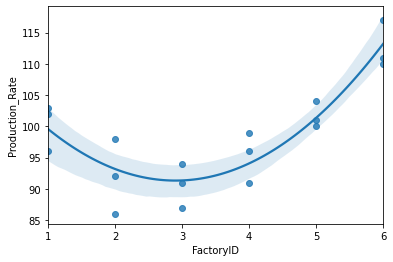

In [35]:
# Step 3:  Perform a Quadratic Fit to the Data
import seaborn as sns
sns.regplot('FactoryID', 'Production_Rate', df, ci=95, order=2)

quadratic = sm.ols('Production_Rate ~ np.power(FactoryID,2) + FactoryID',df,).fit()
print (quadratic.summary())

In [36]:
# Equation -> y = a*x^2 + bx + c

c = quadratic.params[0]
a = quadratic.params[1]
b = quadratic.params[2]

r2 = quadratic.rsquared

N_quadraticlinear = 3
v_quadraticlinear = N_quadraticlinear - 1

N = len(df['FactoryID'])
v_total_2 = N - 1
v_error_2 = v_total_2 - v_quadraticlinear



In [37]:
SS_total_2 = (N-1)*df['Production_Rate'].var()

SS_quadraticlinear = r2*SS_total_1

SS_error_2 = SS_total_1 - SS_quadraticlinear

In [38]:
print ()
print ("SS_treatment, SS_error_0, SS_total, v_treatment, v_error_0, v_total")
print (SS_treatment, SS_error_0, SS_total_0, v_treatment, v_error_0, v_total_0)

print ()
print ("SS_linear, SS_error_1, SS_total, v_linear, v_error_1, v_total")
print (SS_linear, SS_error_1, SS_total_1, v_linear, v_error_1, v_total_1)

print ()
print ("SS_quadraticlinear, SS_error_2, SS_total, v_quadraticlinear, v_error_2, v_total")
print (SS_quadraticlinear, SS_error_2, SS_total_2, v_quadraticlinear, v_error_2, v_total_2)


SS_treatment, SS_error_0, SS_total, v_treatment, v_error_0, v_total
981.7777777777796 195.33333333333334 1177.111111111113 5.0 12.0 17.0

SS_linear, SS_error_1, SS_total, v_linear, v_error_1, v_total
389.5047619047622 787.6063492063491 1177.1111111111113 1 16 17

SS_quadraticlinear, SS_error_2, SS_total, v_quadraticlinear, v_error_2, v_total
968.5682539682542 208.5428571428571 1177.1111111111113 2 15 17


## Intermediate Conclusions:

We see that of the quadratic + linear fit (SS_quadraticlinear = 968.5682), approximatley 38% (SS_linear = 389.5048) is due to a linear dependence.  The remainder then must be due to a quadratic dependence!

We also see that of the total fit (SS_treatment = 981.7777), approximatley 99% (SS_quadratic = 968.5682) is due to a quadratic + linear dependence.  The remainder then must be due to a higher order dependence, and also must be very small!

In [41]:
SS_quadratic = SS_quadraticlinear-SS_linear
v_quadratic = v_quadraticlinear-v_linear

SS_higherorder = SS_treatment - SS_quadraticlinear
v_higherorder = v_treatment - v_quadraticlinear

MS_quadratic = SS_quadratic/v_quadratic
MS_higherorder = SS_higherorder/v_higherorder

fSN_quadratic = MS_quadratic/MS_error
fSN_higherorder = MS_higherorder/MS_error

fdist_quadratic = stats.f(v_quadratic,v_error_1)
fhigh_quadratic = fdist_quadratic.ppf(1-alpha)

pvalue_quadratic = 1-fdist_quadratic.cdf(fSN_quadratic)

fdist_higherorder = stats.f(v_higherorder,v_error_1)
fhigh_higherorder = fdist_higherorder.ppf(1-alpha)

pvalue_higherorder = 1-fdist_higherorder.cdf(fSN_higherorder)

# print table

print ("Source     df     Sum of Squares Mean Square     f     P-value")
print ("linear      %0.0f       %0.2f           %0.2f        %0.2f    %0.3f" %(v_linear,SS_linear,MS_linear,fSN_linear,pvalue_linear))
print ("quadratic   %0.0f       %0.2f           %0.2f        %0.2f    %0.3f" %(v_quadratic,SS_quadratic,MS_quadratic,fSN_quadratic,pvalue_quadratic))
print ("higher      %0.0f       %0.2f            %0.2f          %0.2f     %0.3f" %(v_higherorder,SS_higherorder,MS_higherorder,fSN_higherorder,pvalue_higherorder))
print ("Error      %0.0f       %0.2f           %0.2f" %(v_error_0,SS_error_0,MS_error))
print ("Total      %0.0f       %0.2f" %(v_total_1,SS_total_1))

Source     df     Sum of Squares Mean Square     f     P-value
linear      1       389.50           389.50        23.93    0.000
quadratic   1       579.06           579.06        35.57    0.000
higher      3       13.21            4.40          0.27     0.846
Error      12       195.33           16.28
Total      17       1177.11


# Conclusion

1.  There is a linear term (p = 0.000)
2.  There is a quadratic term (p = 0.000)
3.  There is no evidence for higher order terms (p = 0.846)